# Global Power Plant Database

## Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

As per observation:

1. The dataset has 907 rows and 27 columns.
2. So many null values in most of columns.
3. Dataset has float and object types data.
4. Drop unwanted columns.
5. Columns with more than 70%-75% nulls, also drop them, otherwise it gives poor performance of models.
   ['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']
   drop these columns, which have more than 75% nulls.

In [5]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

# Now Seperate Object and Numeric (Int, Float) datatype for future process.

In [7]:
object_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_datatypes.append(i)
print(len(object_datatypes))
object_datatypes  

10


['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [8]:
for i in df.columns:
    if df[i].dtypes == 'object':
        val=df[i].unique()
        nval=df[i].nunique()
        print(i ,'\t:', nval )

country 	: 1
country_long 	: 1
name 	: 907
gppd_idnr 	: 907
primary_fuel 	: 8
owner 	: 280
source 	: 191
url 	: 304
geolocation_source 	: 3
generation_data_source 	: 1


As per observation,
1. country, country_long, generation_data_source have only 1 value in columns,
2. name and gppd_idnr columns have totaly different values throught out columns, 
3. url, owner, geolocation_source based on only source value only.
which are not give such information to predict data, So drop these columns.

In [9]:
df.drop(columns=['country','country_long','name','gppd_idnr','owner','generation_data_source','geolocation_source','url'],inplace=True)

In [10]:
numeric_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_datatypes.append(i) 
print('Total:', len(numeric_datatypes))
numeric_datatypes

Total: 10


['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [11]:
for i in df.columns:
    if df[i].dtypes != 'object':
        val=df[i].unique()
        nval=df[i].nunique()
        print(i ,'\t:', nval )

capacity_mw 	: 361
latitude 	: 836
longitude 	: 827
commissioning_year 	: 73
year_of_capacity_data 	: 1
generation_gwh_2014 	: 371
generation_gwh_2015 	: 396
generation_gwh_2016 	: 403
generation_gwh_2017 	: 408
generation_gwh_2018 	: 410


As per observation,

1 .year_of_capacity_data has only 1 value in columns, which is not give such information to predict data, So drop this column.

In [12]:
df.drop(columns='year_of_capacity_data',inplace=True)

In [13]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [14]:
df1=df.copy()
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


# Since the dataset has a lot of string vales. We will use the encoding techniques to convert the sring data to numerical data.

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1.0,NaN,174.0,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,NaN,77.0,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,7.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN


# Handle the Null values with different techniques

In [16]:
df.longitude = df.longitude.fillna(df.longitude.mode().iloc[0]) # 0 or ‘index’ : get mode of longitude column

In [17]:
df.latitude = df.latitude.fillna(df.latitude.mode().iloc[0]) # 0 or ‘index’ : get mode of latitute column

In [18]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)

In [19]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# Data Visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

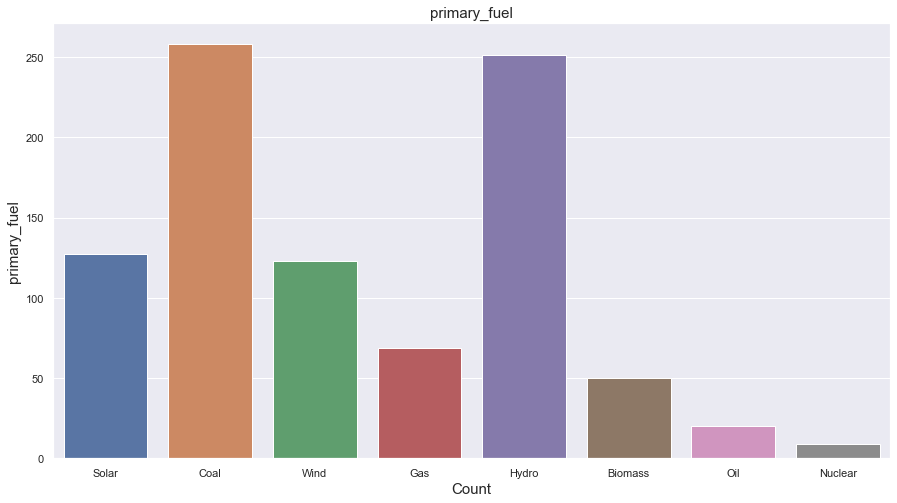

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df1['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)

df1.primary_fuel.value_counts()

As per observation, most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
Use of solar and wind also considerable.

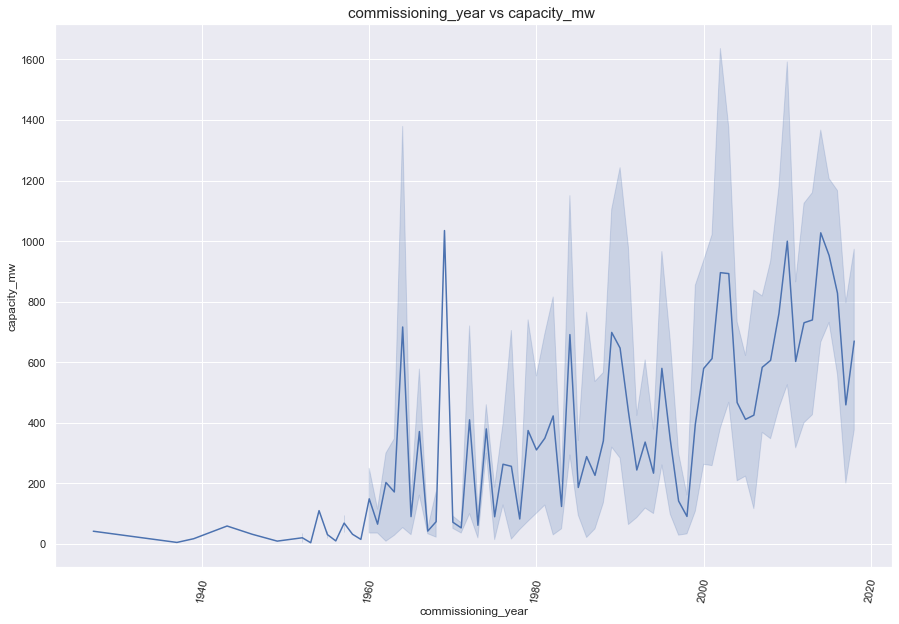

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df1, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

As per observation, increase in the years the devlopment of plants (on record) and capcaity also incresed.

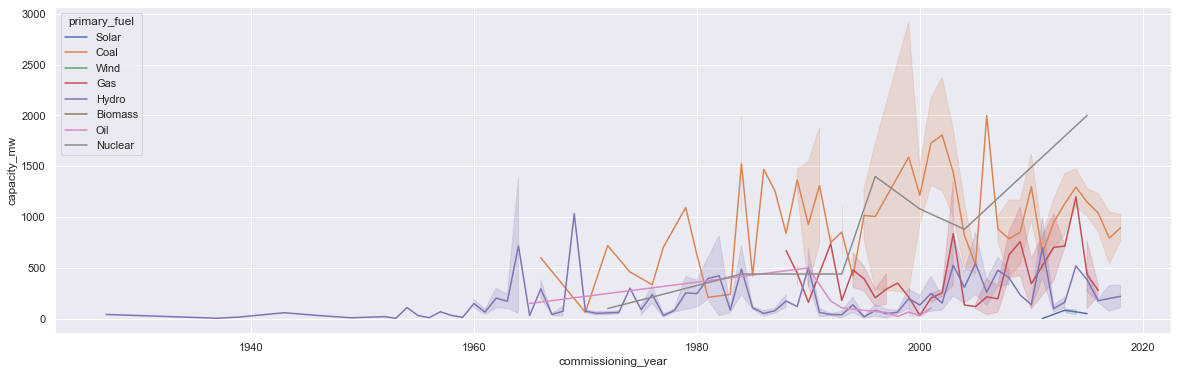

In [22]:
plt.figure(figsize=(20,6))
sns.lineplot(x='commissioning_year',y='capacity_mw',hue="primary_fuel",data=df1,ci=68)
plt.show()

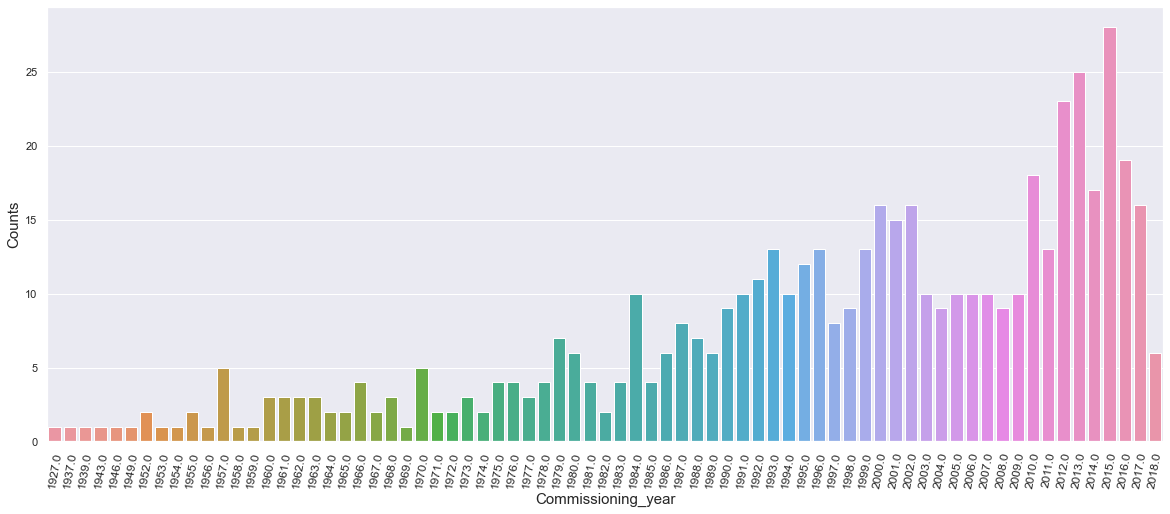

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(df1['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

Commissioning year means he date notified by corporation as the year on which the Plant is ready to commence for operations after successfully completing the testing.
Up to 1956 very less data avalilable of power plants in india, but after 1957 year by year the record is increase.
This indicates only the year value, when the record is noted on respective year, so can drop this column.

In [24]:
df.drop(columns='commissioning_year',inplace=True)

In [25]:
df1.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

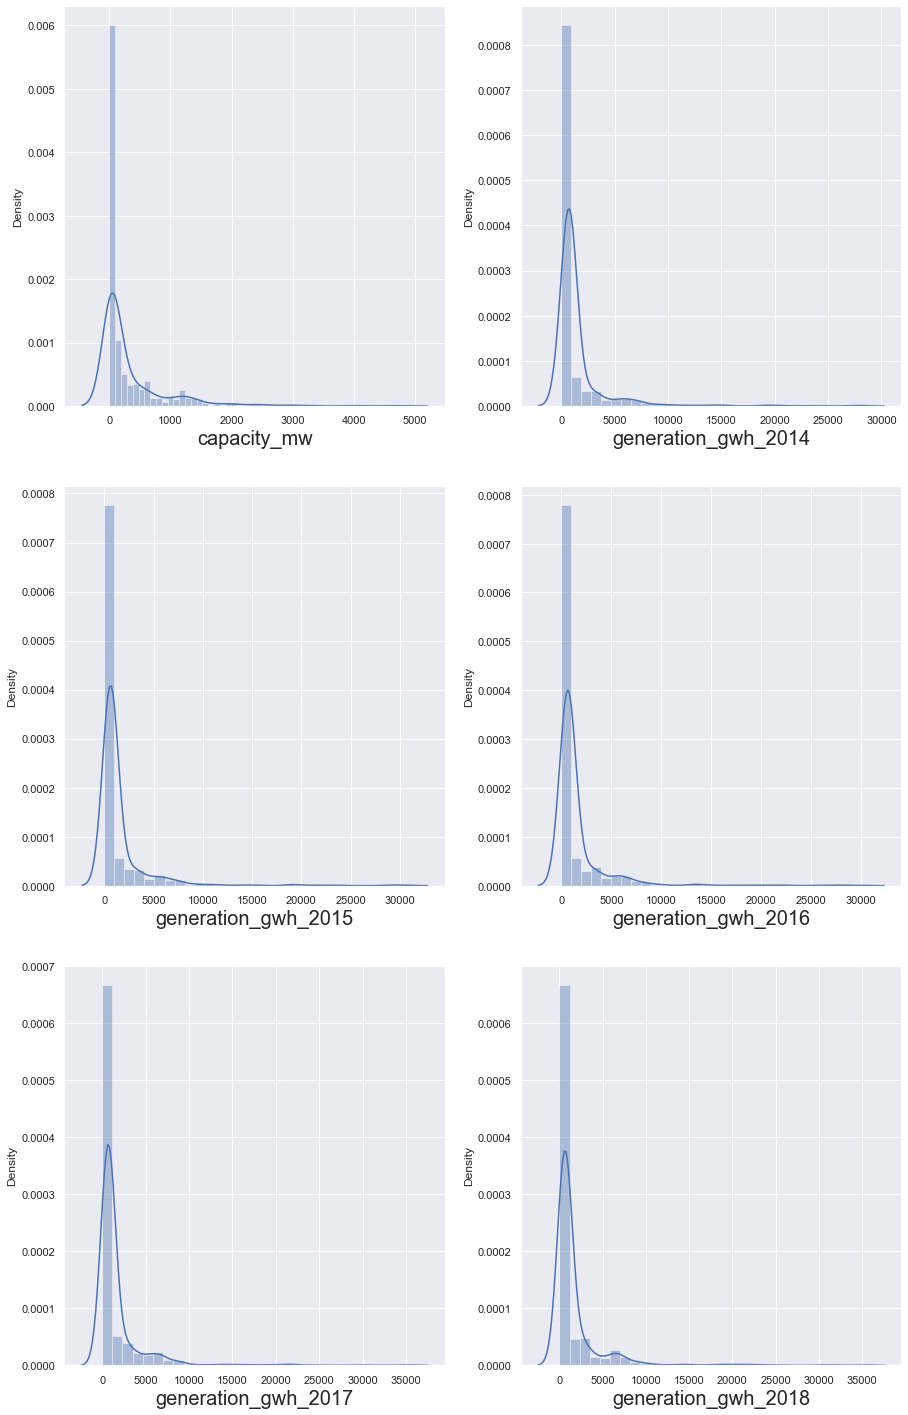

In [26]:
df2=['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018']

plt.figure (figsize=(15,25))
plotnumber = 1

for column in df2:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

As per observation, capacity_mw is mostly dependent on Coal & Hydro as mostly they are primary fuel for most of power plants.

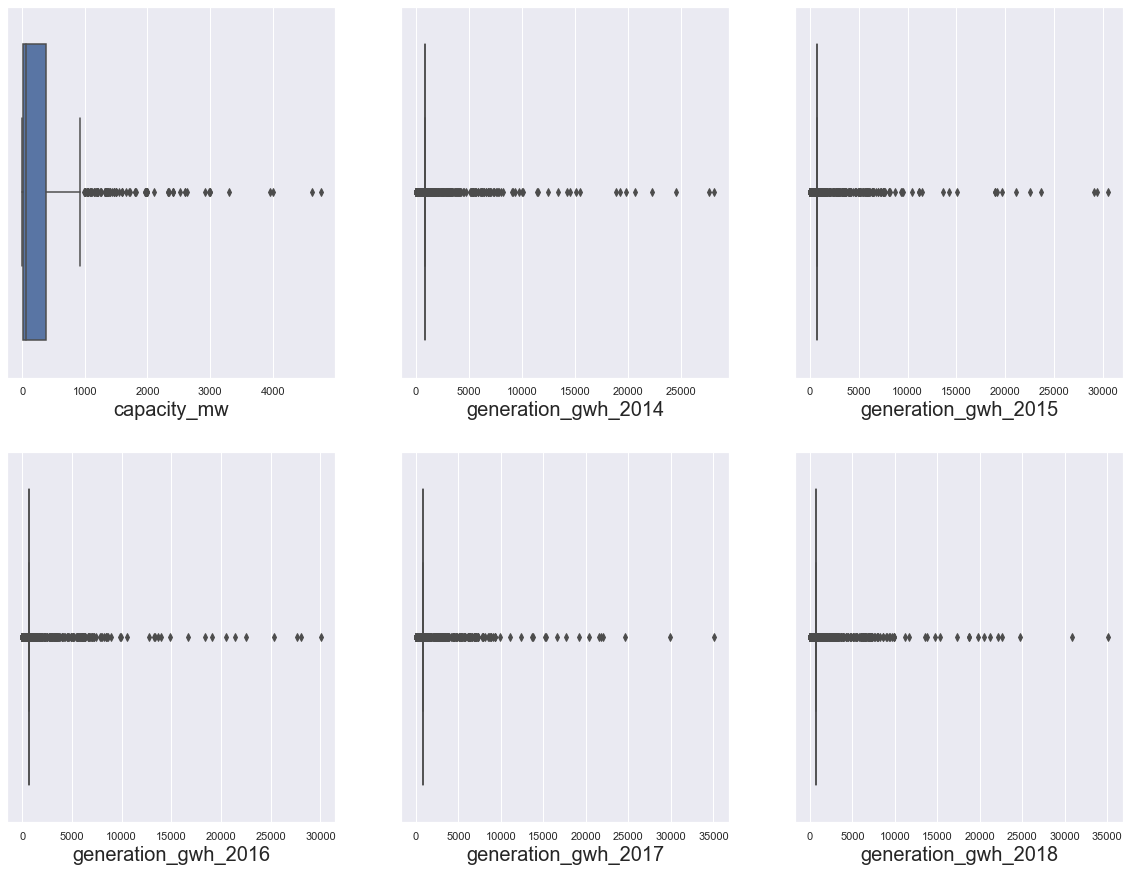

In [27]:
plt.figure (figsize=(20,15))
plotnumber = 1

for column in df2:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

In [28]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.086467,77.172109,3.206174,43.847850,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.098262,4.976401,2.280652,44.642818,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,73.811550,1.000000,22.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.493800,3.000000,22.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,6.000000,29.500000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,7.000000,190.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In very huge level of outlier in the 'capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018' columns, let's try to reduce it.

# correlation of one variable vs all other variables, or multicorelation

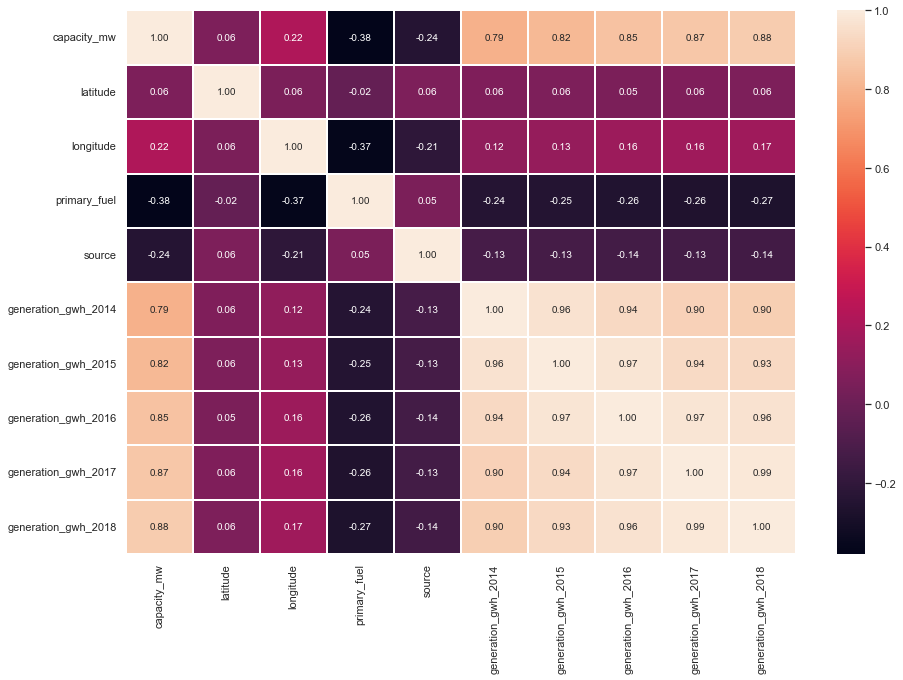

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, linewidths=0.1,fmt="0.2f")
plt.show()

# [1] Regression Problem (Target = capacity_mw)

## Now Check correlation of the columns with the target column

In [30]:
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
source                -0.242122
latitude               0.059041
longitude              0.215875
generation_gwh_2014    0.793497
generation_gwh_2015    0.819676
generation_gwh_2016    0.853008
generation_gwh_2017    0.868338
generation_gwh_2018    0.884840
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

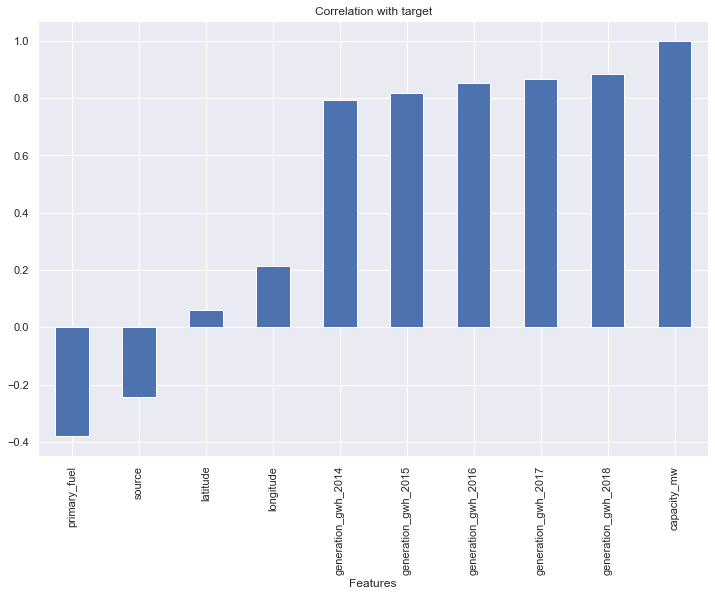

In [31]:
plt.figure(figsize=(12,8))
df.corr()['capacity_mw'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation with target')
plt.show()

## Now Separting columns into features and target

In [32]:
x=df.drop(columns='capacity_mw')
y=df.capacity_mw
x.skew().sort_values()

latitude              -0.095721
primary_fuel           0.472251
longitude              1.130252
source                 1.827373
generation_gwh_2018    5.133226
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
dtype: float64

Dataset is very skewed, let's try to handle this or save it.

## Now use PowerTransformation method to save our skewed data.

In [33]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()

source                -0.214066
latitude              -0.069526
primary_fuel          -0.047067
longitude              0.040507
generation_gwh_2018    0.193103
generation_gwh_2017    0.196816
generation_gwh_2016    0.204011
generation_gwh_2015    0.222151
generation_gwh_2014    0.285906
dtype: float64

Using power transformation, most of skewness has removed

In [34]:
x1=df_pw.copy()
x1=df_pw.drop(columns=['primary_fuel','source']) # These are categorical columns 
print(x1.columns)

Index(['latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')


## Now remove remaining outliers using z-score technique.

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(x1))
threshold=3
np.where(z>3)

(array([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 786, 786,
        786, 786, 786, 808, 808, 808, 808, 880, 880, 880, 880, 880],
       dtype=int64),
 array([6, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6,
        2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3,
        4, 6, 2, 3, 4, 5, 6], dtype=int64))

In [36]:
df_new= df[(z<3).all(axis=1)]

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 1.4332965821389196


In [37]:
df_new.shape

(894, 10)

Very less data, we have loss using z-score method, let's proceed further.

In [38]:
x_new=df_new.drop(columns='capacity_mw')
y_new=df_new.capacity_mw

## Data Scaling using Standard Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_new),columns=x_new.columns)
x_scaled

,latitude,longitude,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.160481,-0.783338,1.211177,1.445165,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
1,0.603122,-0.507043,-0.981598,2.894019,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
2,0.136292,-1.564287,1.649732,-0.516362,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
3,0.457145,2.875459,-0.543043,-0.494072,-0.380526,-0.222690,-0.221676,-0.384684,-0.381179
4,0.145506,1.068000,-0.981598,-0.494072,1.053468,2.718120,2.754618,2.155506,2.996341
...,...,...,...,...,...,...,...,...,...
889,-0.778435,0.047809,-0.981598,-0.494072,-0.271788,-0.711268,-0.584147,-0.276216,-0.350585
890,-1.333201,0.211086,1.211177,0.731882,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
891,-0.944635,-0.310751,1.649732,-0.516362,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
892,0.535230,-0.680962,-0.981598,0.330661,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512


## PCA : Principal Component Analysis

                     PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9
Explained_Variance  4.73  1.28  1.05  0.91  0.57  0.31  0.08  0.04  0.03


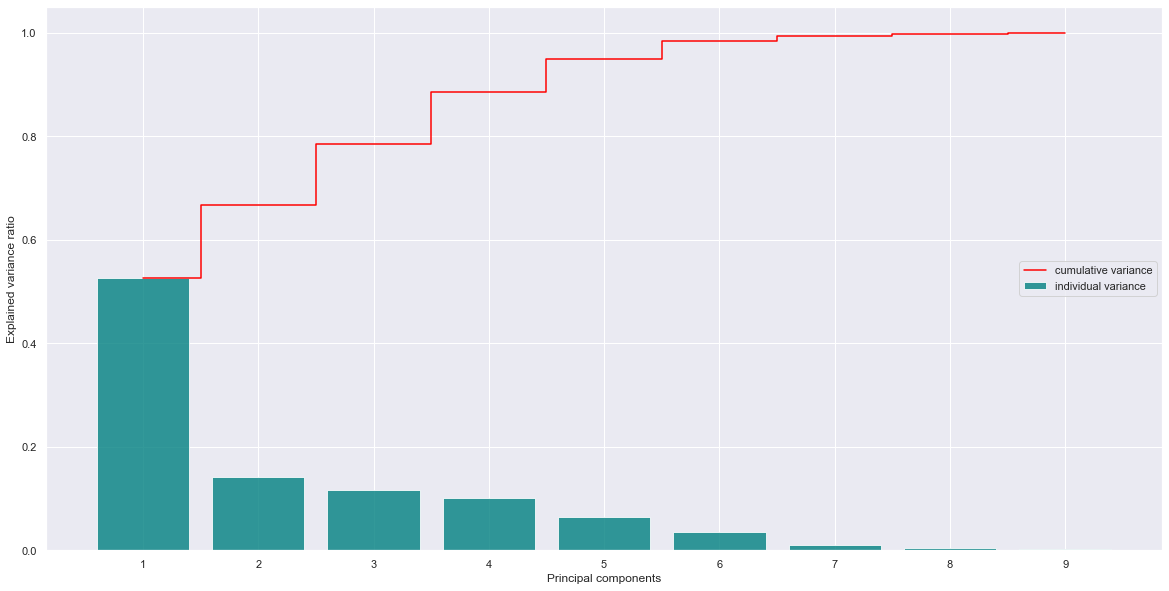

In [40]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 1)
pca.fit(x_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["PC" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(20,10))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [41]:
pca_red = PCA(n_components=7)
X_reduced = pca_red.fit_transform(x_scaled)

As per PCA observation the first 7 components account for above 99% of the total explained variance. The dataset can reduced with 7 components and proceed further.

In [42]:
X=X_reduced
y=y_new

## Regression Model Development

In [43]:
#import the necessary model algos.
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

#evaluation metrics
from sklearn.metrics import r2_score

In [44]:
LR = LinearRegression()
LSO= Lasso()
RIG= Ridge()
KNNR= KNeighborsRegressor()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
SVr = SVR()
BAGR= BaggingRegressor()
GRAR= GradientBoostingRegressor()
ADAR= AdaBoostRegressor()
SGDR= SGDRegressor()
XGBR= XGBRegressor()

In [69]:
model=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), SVR(), 
       BaggingRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), SGDRegressor(), XGBRegressor()]

models=['LR = LinearRegression()','LSO = Lasso()', 'RIG = Ridge()', 'KNNR = KNeighborsRegressor()',
        'RFR = RandomForestRegressor()', 'DTR = DecisionTreeRegressor()', 'SVr = SVR()', 'BAGR = BaggingRegressor()',
        'GRAR = GradientBoostingRegressor()', 'ADAR = AdaBoostRegressor()', 'SGDR= SGDRegressor()', 'XGBR= XGBRegressor()' ]

acc_result=[]
train_result=[]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=11)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    
    x_pred=clf.predict(x_train)
    y_pred=clf.predict(x_test)
    
    train_result.append(round (r2_score(y_train,x_pred)*100,2))
    acc_result.append(round (r2_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Training Score:':train_result,'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Training Score:,Accuracy Score (without tuning)
0,LR = LinearRegression(),72.77,74.21
1,LSO = Lasso(),72.77,74.44
2,RIG = Ridge(),72.77,74.28
3,KNNR = KNeighborsRegressor(),83.28,82.73
4,RFR = RandomForestRegressor(),96.78,81.08
5,DTR = DecisionTreeRegressor(),99.99,68.91
6,SVr = SVR(),-13.32,-30874.26
7,BAGR = BaggingRegressor(),94.44,80.98
8,GRAR = GradientBoostingRegressor(),95.78,80.86
9,ADAR = AdaBoostRegressor(),65.36,8.74


## 1.1 Linear Regression:

In [70]:
acc_train=[]
acc_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    x_lr_predict=lr.predict(x_train)
    y_lr_predict=lr.predict(x_test)
    
    acc_train.append(r2_score(y_train,x_lr_predict))
    acc_test.append(r2_score(y_test,y_lr_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 99
Index of max vaule of test's accuracy_score at random_state: 193


Always choose best training score for random_state, because

1. if training score >= testing score ==> chance of best fit or undetfit
2. if training score << testing score ==> overfit
3. if training score >> testing score ==> undetfit

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)
    
lr.fit(x_train,y_train)
x_lr_predict=lr.predict(x_train)
y_lr_predict=lr.predict(x_test)
    
print ("The training accurancy @ 99 state is:",r2_score(y_train,x_lr_predict))
print ("The testing accurancy @ 99 state is:",r2_score(y_test,y_lr_predict))

The training accurancy @ 99 state is: 0.7910406559409485
The testing accurancy @ 99 state is: 0.458182361357522


In [72]:
#Cross-Validation of the Model

kford_val=KFold(n_splits=10,shuffle=False)

Train_accuracy=r2_score(y_train,x_lr_predict)
Test_accuracy =r2_score(y_test,y_lr_predict)

from sklearn.model_selection import cross_val_score

for i in range (2,10):
    cv_score = cross_val_score(lr,X,y,cv=kford_val)
    cv_mean = cv_score.mean()
    print("At Cross fold", i, "the cv score is", cv_mean, "\n  accuracy score for training is", Train_accuracy,
          "\n& accuracy for testing is", Test_accuracy)
    print("\n")

At Cross fold 2 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406559409485 
& accuracy for testing is 0.458182361357522


At Cross fold 3 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406559409485 
& accuracy for testing is 0.458182361357522


At Cross fold 4 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406559409485 
& accuracy for testing is 0.458182361357522


At Cross fold 5 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406559409485 
& accuracy for testing is 0.458182361357522


At Cross fold 6 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406559409485 
& accuracy for testing is 0.458182361357522


At Cross fold 7 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406559409485 
& accuracy for testing is 0.458182361357522


At Cross fold 8 the cv score is 0.7173395510318294 
  accuracy score for training is 0.7910406

## 1.2 Lasso Regression:

In [51]:
lasscv = LassoCV (alphas=None, max_iter= 100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [52]:
# best alpha parameter
alpha = lasscv.alpha_
las = Lasso(alpha)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.7909734861620291

In [53]:
y_las_predict=las.predict(x_test)
r2_score(y_test,y_las_predict)

0.4645469437302565

In [54]:
cv_score=cross_val_score(las,X,y,cv=kford_val)
cv_score.mean()

0.7176366198936335

## 1.3 Ridge Regression:

In [55]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)
alpha = ridgecv.alpha_

rig = Ridge (alpha)
rig.fit(x_train,y_train)
rig.score(x_train,y_train)

0.7910405838359936

In [56]:
y_rig_predict=rig.predict(x_test)
r2_score(y_test,y_rig_predict)

0.45842395968235694

In [57]:
cv_score=cross_val_score(rig,X,y,cv=kford_val)
cv_score.mean()

0.7173595943034015

## 1.4 KNeighbors Regressor:

In [58]:
knnr=KNeighborsRegressor(n_neighbors = 10)
knnr.fit(x_train,y_train)

y_knnr_predict=knnr.predict(x_test)
print('R2 Score:',r2_score(y_test,y_knnr_predict))

cv_score=cross_val_score(knnr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.599857888007428
Cross validation: 0.7633693698370305


## 1.5 RandomForest Regression:

In [59]:
rfr=RandomForestRegressor(criterion='mse')

rfr.fit(x_train,y_train)

y_rfr_predict=rfr.predict(x_test)
print('R2 Score:',r2_score(y_test,y_rfr_predict))

cv_score=cross_val_score(rfr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.6126241156870595
Cross validation: 0.7870179055719447


## 1.6 Decision Tree Regression:

In [60]:
dtr=DecisionTreeRegressor(criterion='mse')

dtr.fit(x_train,y_train)

y_dtr_predict=dtr.predict(x_test)
print('R2 Score:',r2_score(y_test,y_dtr_predict))

cv_score=cross_val_score(dtr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.4641772152994522
Cross validation: 0.5961817472316047


## 1.7 SVR:

In [61]:
svr=SVR(gamma='auto')

svr.fit(x_train,y_train)

y_svr_predict=svr.predict(x_test)
print('R2 Score:',r2_score(y_test,y_svr_predict))

cv_score=cross_val_score(svr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: -0.175304149239079
Cross validation: -0.14032956025885898


## 1.8 Bagging Regression:

In [62]:
bagr=BaggingRegressor(base_estimator=RandomForestRegressor())

bagr.fit(x_train,y_train)

y_bagr_predict=bagr.predict(x_test)
print('R2 Score:',r2_score(y_test,y_bagr_predict))

cv_score=cross_val_score(bagr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.6339595839525416
Cross validation: 0.7948878977187643


## 1.9 Gradient Boosting Regression:

In [63]:
grar=GradientBoostingRegressor(criterion='mse', n_estimators=10, learning_rate=1)

grar.fit(x_train,y_train)

y_grar_predict=grar.predict(x_test)
print('R2 Score:',r2_score(y_test,y_grar_predict))

cv_score=cross_val_score(grar,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.5171428630382027
Cross validation: 0.6686622575827559


## 1.10 AdaBoost Regression:

In [64]:
adar=AdaBoostRegressor(base_estimator=BaggingRegressor(),learning_rate=0.01)

adar.fit(x_train,y_train)

y_adar_predict=adar.predict(x_test)
print('R2 Score:',r2_score(y_test,y_adar_predict))

cv_score=cross_val_score(adar,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.6306832741805981
Cross validation: 0.7927937432628631


## 1.11 SGDRegressor:

In [65]:
sgdr=SGDRegressor(alpha=0.1)

sgdr.fit(x_train,y_train)

y_sgdr_predict=sgdr.predict(x_test)
print('R2 Score:',r2_score(y_test,y_sgdr_predict))

cv_score=cross_val_score(sgdr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.5443208200536325
Cross validation: 0.7205843542046256


## 1.12 XGBRegressor:

In [66]:
xgbr=XGBRegressor(n_estimators = 10, learning_rate = 1)

xgbr.fit(x_train,y_train)

y_xgbr_predict=adar.predict(x_test)
print('R2 Score:',r2_score(y_test,y_xgbr_predict))

cv_score=cross_val_score(xgbr,X,y,cv=kford_val)
print ('Cross validation:',cv_score.mean())

R2 Score: 0.6306832741805981
Cross validation: 0.6889982811785647


In [73]:
Acc_Score_tun =[round (r2_score(y_test,y_lr_predict)*100,2),
                round (r2_score(y_test,y_las_predict)*100,2),
                round (r2_score(y_test,y_rig_predict)*100,2),
                round (r2_score(y_test,y_knnr_predict)*100,2),
                round (r2_score(y_test,y_rfr_predict)*100,2),
                round (r2_score(y_test,y_dtr_predict)*100,2),
                round (r2_score(y_test,y_svr_predict)*100,2),
                round (r2_score(y_test,y_bagr_predict)*100,2),
                round (r2_score(y_test,y_grar_predict)*100,2),
                round (r2_score(y_test,y_adar_predict)*100,2),
                round (r2_score(y_test,y_sgdr_predict)*100,2),
                round (r2_score(y_test,y_xgbr_predict)*100,2)]

GPP_Capacity = pd.DataFrame({'Regressor':['lr = LinearRegression()', 'las = Lasso()','rig = Ridge()',
                                'knn = KNeighborsRegressor()' ,'rf = RandomForestRegressor()', 'dt = DecisionTreeRegressor()',
                                 'svr = SVR()', 'bag = BaggingRegressor()', 'gra = GradientBoostingRegressor()',
                                 'ada = AdaBoostRegressor()','sgdr = SGDRegressor()', 'xgbr = XGBRegressor()'],
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
GPP_Capacity

,Regressor,Accuracy Score (with tuning)
0,lr = LinearRegression(),45.82
1,las = Lasso(),46.45
2,rig = Ridge(),45.84
3,knn = KNeighborsRegressor(),59.99
4,rf = RandomForestRegressor(),61.26
5,dt = DecisionTreeRegressor(),46.42
6,svr = SVR(),-17.53
7,bag = BaggingRegressor(),63.40
8,gra = GradientBoostingRegressor(),51.71
9,ada = AdaBoostRegressor(),63.07


In [74]:
GLOBAL_POWER_PLANT_CAPACITY= pd.concat([Result_df,GPP_Capacity],axis=1)
GLOBAL_POWER_PLANT_CAPACITY

,Model Name,Training Score:,Accuracy Score (without tuning),Regressor,Accuracy Score (with tuning)
0,LR = LinearRegression(),72.77,74.21,lr = LinearRegression(),45.82
1,LSO = Lasso(),72.77,74.44,las = Lasso(),46.45
2,RIG = Ridge(),72.77,74.28,rig = Ridge(),45.84
3,KNNR = KNeighborsRegressor(),83.28,82.73,knn = KNeighborsRegressor(),59.99
4,RFR = RandomForestRegressor(),96.78,81.08,rf = RandomForestRegressor(),61.26
5,DTR = DecisionTreeRegressor(),99.99,68.91,dt = DecisionTreeRegressor(),46.42
6,SVr = SVR(),-13.32,-30874.26,svr = SVR(),-17.53
7,BAGR = BaggingRegressor(),94.44,80.98,bag = BaggingRegressor(),63.40
8,GRAR = GradientBoostingRegressor(),95.78,80.86,gra = GradientBoostingRegressor(),51.71
9,ADAR = AdaBoostRegressor(),65.36,8.74,ada = AdaBoostRegressor(),63.07


# We are gettig high model accuracy: 83.06% in XGBRegressor model without tuning with very good cross_val_score,
# The XGBRegressor shows model is performing exremely well, so we can save this model.
# Save the model using pickle

In [75]:
import pickle
pickle.dump(XGBR,open('Global_Power_Plant-RegressionModel_Capacity_mw','wb'))

# [2] Classification Problem (Target = primary_fuel)

## Now Check correlation of the columns with the target column

In [76]:
df.corr()['primary_fuel'].sort_values()

capacity_mw           -0.380395
longitude             -0.368766
generation_gwh_2018   -0.271198
generation_gwh_2017   -0.263599
generation_gwh_2016   -0.259708
generation_gwh_2015   -0.249304
generation_gwh_2014   -0.240656
latitude              -0.020203
source                 0.053613
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

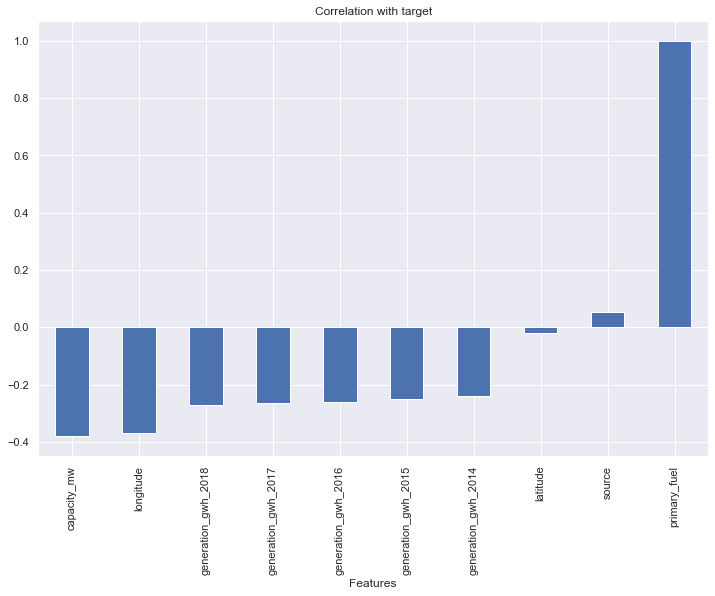

In [77]:
plt.figure(figsize=(12,8))
df.corr()['primary_fuel'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation with target')
plt.show()

## Now Separting columns into features and target

In [78]:
x=df.drop(columns='primary_fuel')
y=df.primary_fuel
x.skew().sort_values()

latitude              -0.095721
longitude              1.130252
source                 1.827373
capacity_mw            3.123576
generation_gwh_2018    5.133226
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
dtype: float64

Dataset is very skewed, let's try to handle it or save it.

## Now use PowerTransformation method to save our skewed data

In [79]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()

source                -0.214066
latitude              -0.069526
capacity_mw            0.022164
longitude              0.040507
generation_gwh_2018    0.193103
generation_gwh_2017    0.196816
generation_gwh_2016    0.204011
generation_gwh_2015    0.222151
generation_gwh_2014    0.285906
dtype: float64

Using power transformation, most of skewness has removed

In [80]:
x1=df_pw.copy()
x1=df_pw.drop(columns=['source']) # This is categorical columns 
print(x1.columns)

Index(['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')


## Now remove remaining outliers using z-score technique

In [81]:
from scipy.stats import zscore
z=np.abs(zscore(x1))
threshold=3
np.where(z>3)

(array([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 786, 786,
        786, 786, 786, 808, 808, 808, 808, 880, 880, 880, 880, 880],
       dtype=int64),
 array([7, 3, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7,
        3, 4, 5, 6, 3, 4, 5, 6, 7, 3, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4,
        5, 7, 3, 4, 5, 6, 7], dtype=int64))

In [82]:
df_new= df[(z<3).all(axis=1)]

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 1.4332965821389196


In [83]:
df_new.shape

(894, 10)

Very less data, we have loss using z-tarnsformation method, let's proceed further.

In [84]:
x_new=df_new.drop(columns='primary_fuel')
y_new=df_new.primary_fuel

## Data Scaling using Standard Scaler

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_new),columns=x_new.columns)
x_scaled

,capacity_mw,latitude,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.601049,1.160481,-0.783338,1.445165,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
1,-0.397302,0.603122,-0.507043,2.894019,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
2,-0.522751,0.136292,-1.564287,-0.516362,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
3,-0.318363,0.457145,2.875459,-0.494072,-0.380526,-0.222690,-0.221676,-0.384684,-0.381179
4,3.233880,0.145506,1.068000,-0.494072,1.053468,2.718120,2.754618,2.155506,2.996341
...,...,...,...,...,...,...,...,...,...
889,2.807184,-0.778435,0.047809,-0.494072,-0.271788,-0.711268,-0.584147,-0.276216,-0.350585
890,-0.599982,-1.333201,0.211086,0.731882,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
891,-0.551979,-0.944635,-0.310751,-0.516362,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512
892,-0.435705,0.535230,-0.680962,0.330661,-0.271788,-0.299544,-0.304347,-0.301728,-0.317512


## PCA : Principal Component Analysis

                     PC1   PC2   PC3   PC4   PC5  PC6   PC7   PC8   PC9
Explained_Variance  5.31  1.16  1.02  0.76  0.41  0.2  0.08  0.04  0.02


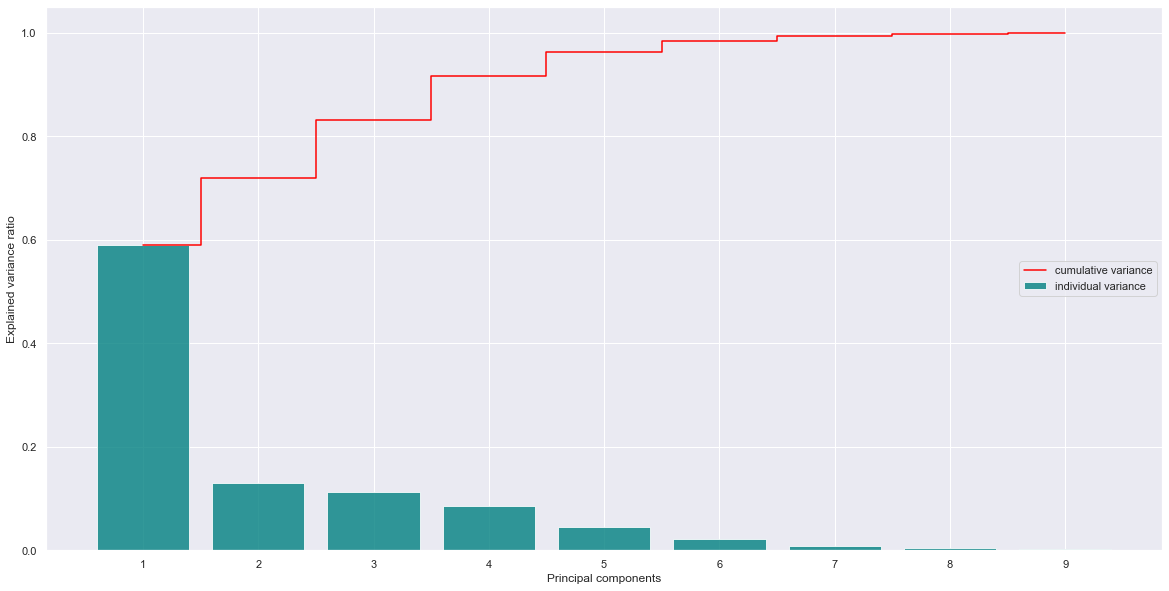

In [86]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 1)
pca.fit(x_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["PC" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(20,10))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [87]:
pca_red = PCA(n_components=7)
X_reduced = pca_red.fit_transform(x_scaled)

As per PCA observation the first 7 components account for about 99% of the total explained variance. The dataset can reduced with 7 components and proceed further.

In [88]:
XC=X_reduced
yc=y_new

## Classification Model Development

In [89]:
#!pip install xgboost

In [90]:
#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [91]:
LC = LogisticRegression()
DTC = DecisionTreeClassifier()
KNNC= KNeighborsClassifier()
RFC = RandomForestClassifier()
SVc = SVC()
GRAC= GradientBoostingClassifier()
ADAC= AdaBoostClassifier()
GNBC= GaussianNB()
SGDC= SGDClassifier()
XGBC= XGBClassifier()

In [93]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(), SVC(),
       GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),SGDClassifier(),XGBClassifier()]

models=['LC=LogisticRegression','DTC=DecisionTreeClassifier','KNNC=KNeighborsClassifier','RFC=RandomForestClassifier',
        'SVc=SVC()','GRAC=GradientBoostingClassifier','ADAC=AdaBoostClassifier','GNBC=GaussianNB', 'SGDC=SGDClassifier()',
        'XGBC=XGBClassifier()']

acc_result=[]
train_result=[]

x_train,x_test,y_train,y_test=train_test_split(XC,yc,test_size=0.20,random_state=11)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    x_pred=clf.predict(x_train)
    y_pred=clf.predict(x_test)
    train_result.append(round (accuracy_score(y_train,x_pred)*100,2))
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Training Score:':train_result ,'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Training Score:,Accuracy Score (without tuning)
0,LC=LogisticRegression,63.64,59.22
1,DTC=DecisionTreeClassifier,100.00,60.34
2,KNNC=KNeighborsClassifier,78.88,64.25
3,RFC=RandomForestClassifier,100.00,72.63
4,SVc=SVC(),68.11,58.66
5,GRAC=GradientBoostingClassifier,100.00,69.27
6,ADAC=AdaBoostClassifier,37.62,34.08
7,GNBC=GaussianNB,58.46,48.60
8,SGDC=SGDClassifier(),49.37,45.81
9,XGBC=XGBClassifier(),100.00,74.30


## 1.1 Logistic Regression:

In [94]:
acc_train=[]
acc_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=i)
    
    lc = LogisticRegression()
    lc.fit(x_train,y_train)
    
    x_lc_predict=lc.predict(x_train)
    y_lc_predict=lc.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_lc_predict))
    acc_test.append(accuracy_score(y_test,y_lc_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)


Index of max vaule of train's accuracy_score at random_state: 427
Index of max vaule of test's accuracy_score at random_state: 366


Always choose best training score for random_state, because

1. if training score >= testing score ==> chance of best fit or undetfit
2. if training score << testing score ==> overfit
3. if training score >> testing score ==> undetfit

In [96]:
kford_cv=KFold(n_splits=10,shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=427)
    
lc.fit(x_train,y_train)
x_lc_predict=lc.predict(x_train)
y_lc_predict=lc.predict(x_test)
lc_cv = cross_val_score(lc,XC,yc,cv=kford_cv, scoring='accuracy')
    
print ("The training accurancy @ 427 random_state is:",accuracy_score(y_train,x_lc_predict))
print ("The testing accurancy @ 427 ranom_state is:",accuracy_score(y_test,y_lc_predict))
print ("Cross Validation: ", lc_cv.mean())
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_lc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_lc_predict))

The training accurancy @ 427 random_state is: 0.6587412587412588
The testing accurancy @ 427 ranom_state is: 0.5418994413407822
Cross Validation:  0.6129837702871411

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.29      0.33      0.31         6
         1.0       0.68      0.52      0.59        54
         2.0       1.00      0.08      0.15        12
         3.0       0.54      0.58      0.56        64
         5.0       0.00      0.00      0.00         1
         6.0       0.62      0.57      0.59        23
         7.0       0.39      0.84      0.53        19

    accuracy                           0.54       179
   macro avg       0.50      0.42      0.39       179
weighted avg       0.60      0.54      0.53       179


 Conconfusion_matrix:
 [[ 2  2  0  0  0  1  1]
 [ 2 28  0 18  0  4  2]
 [ 1  2  1  6  0  2  0]
 [ 0  7  0 37  0  0 20]
 [ 0  0  0  0  0  1  0]
 [ 2  2  0  4  0 13  2]
 [ 0  0  0  3  0  0 16]]


## 2.2 Decision Tree:

In [97]:
kfld=KFold(n_splits=10)


grid_param = {
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],
            'max_depth': range(10,15), # the max depth of the tree.
            'min_samples_leaf': range (2,6), # the max no of samples required to be at a leaf node.
            'min_samples_split': range (3,8), # the max no of samples required to split on interval node.
            'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}
grid_search = GridSearchCV (DTC, param_grid = grid_param, cv=kfld, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8),
                         'splitter': ['best', 'random']})

In [98]:
#Initiate DecisitionTreeClassifier with new parametes and train
dtc=grid_search.best_estimator_

# Train the model
dtc.fit(x_train,y_train)

x_dtc_predict=dtc.predict(x_train)
y_dtc_predict=dtc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dtc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dtc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_dtc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_dtc_predict))

The training accurancy is: 0.6097902097902098
The testing accurancy is: 0.4972067039106145

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.11      0.17      0.13         6
         1.0       0.56      0.37      0.44        54
         2.0       0.00      0.00      0.00        12
         3.0       0.58      0.64      0.61        64
         5.0       0.00      0.00      0.00         1
         6.0       0.82      0.39      0.53        23
         7.0       0.35      0.95      0.51        19

    accuracy                           0.50       179
   macro avg       0.34      0.36      0.32       179
weighted avg       0.52      0.50      0.48       179


 Conconfusion_matrix:
 [[ 1  2  0  0  0  0  3]
 [ 4 20  0 22  0  1  7]
 [ 0  4  0  6  0  1  1]
 [ 0  5  0 41  0  0 18]
 [ 0  1  0  0  0  0  0]
 [ 4  4  0  1  0  9  5]
 [ 0  0  0  1  0  0 18]]


## 2.3 K-Nearest Neighbour:

In [99]:
neighbors = [i for i in range(1,10)]
parameter_grid = { 'algorithm' : ['kd_tree', 'brute'],
                   'weights':['uniform', 'distance'],
                   'leaf_size' : [3,5,6,7,8,10],
                   'n_neighbors': neighbors}
gridsearch = GridSearchCV(KNNC, param_grid=parameter_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [100]:
#Initiate KNN with new parametes and train
knnc=gridsearch.best_estimator_

# Train the model
knnc.fit(x_train,y_train)

x_knnc_predict=knnc.predict(x_train)
y_knnc_predict=knnc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_knnc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_knnc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_knnc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_knnc_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.7039106145251397

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         6
         1.0       0.71      0.63      0.67        54
         2.0       0.56      0.42      0.48        12
         3.0       0.78      0.78      0.78        64
         5.0       1.00      1.00      1.00         1
         6.0       0.76      0.70      0.73        23
         7.0       0.57      0.89      0.69        19

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.69       179
weighted avg       0.71      0.70      0.70       179


 Conconfusion_matrix:
 [[ 3  1  0  0  0  2  0]
 [ 2 34  3 10  0  3  2]
 [ 0  5  5  1  0  0  1]
 [ 0  5  1 50  0  0  8]
 [ 0  0  0  0  1  0  0]
 [ 1  3  0  1  0 16  2]
 [ 0  0  0  2  0  0 17]]


## 2.4 Random forest:

In [101]:
params = {  'n_estimators' : [10,15,30,40,50],
            'criterion':['gini','entropy'],
            'max_depth': [10,15,40], # the max depth of the tree.
            'min_samples_leaf': [5,6], # the max no of samples required to be at a leaf node.
            'min_samples_split': [10,11] # the max no of samples required to split on interval node.
            #'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}

gridsearch_rf = GridSearchCV(RFC, param_grid=params,cv=10, n_jobs = -1)
gridsearch_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 40], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 15, 30, 40, 50]})

In [102]:
#Initiate RandomForestClassifier with new parametes and train
rfc=gridsearch_rf.best_estimator_

# Train the model
rfc.fit(x_train,y_train)

x_rfc_predict=rfc.predict(x_train)
y_rfc_predict=rfc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rfc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rfc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_rfc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_rfc_predict))

The training accurancy is: 0.855944055944056
The testing accurancy is: 0.6983240223463687

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.33      0.17      0.22         6
         1.0       0.70      0.70      0.70        54
         2.0       0.33      0.17      0.22        12
         3.0       0.86      0.77      0.81        64
         5.0       0.00      0.00      0.00         1
         6.0       0.63      0.74      0.68        23
         7.0       0.56      0.95      0.71        19

    accuracy                           0.70       179
   macro avg       0.49      0.50      0.48       179
weighted avg       0.69      0.70      0.69       179


 Conconfusion_matrix:
 [[ 1  1  0  0  0  3  1]
 [ 0 38  1  6  0  5  4]
 [ 1  7  2  1  0  1  0]
 [ 0  5  3 49  0  0  7]
 [ 0  0  0  0  0  1  0]
 [ 1  3  0  0  0 17  2]
 [ 0  0  0  1  0  0 18]]


## 2.5 SVC

In [103]:
#Initiate RandomForestClassifier with new parametes and train
svc=SVC(gamma='auto')

# Train the model
svc.fit(x_train,y_train)

x_svc_predict=svc.predict(x_train)
y_svc_predict=svc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_svc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_svc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_svc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_svc_predict))

The training accurancy is: 0.6853146853146853
The testing accurancy is: 0.5921787709497207

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.23      0.50      0.32         6
         1.0       0.71      0.59      0.65        54
         2.0       0.50      0.08      0.14        12
         3.0       0.72      0.59      0.65        64
         5.0       0.00      0.00      0.00         1
         6.0       0.72      0.57      0.63        23
         7.0       0.40      1.00      0.57        19

    accuracy                           0.59       179
   macro avg       0.47      0.48      0.42       179
weighted avg       0.65      0.59      0.59       179


 Conconfusion_matrix:
 [[ 3  1  0  0  0  1  1]
 [ 4 32  0 11  0  3  4]
 [ 2  5  1  3  0  1  0]
 [ 0  6  1 38  0  0 19]
 [ 1  0  0  0  0  0  0]
 [ 3  1  0  1  0 13  5]
 [ 0  0  0  0  0  0 19]]


## 2.6 Gradient Boosting Classifier:

In [104]:
#Initiate RandomForestClassifier with new parametes and train
grac=GradientBoostingClassifier(learning_rate= 0.1)

# Train the model
grac.fit(x_train,y_train)

x_grac_predict=grac.predict(x_train)
y_grac_predict=grac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_grac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_grac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_grac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_grac_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.6871508379888268

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         6
         1.0       0.64      0.70      0.67        54
         2.0       0.44      0.33      0.38        12
         3.0       0.83      0.78      0.81        64
         5.0       0.00      0.00      0.00         1
         6.0       0.64      0.70      0.67        23
         7.0       0.65      0.68      0.67        19

    accuracy                           0.69       179
   macro avg       0.51      0.50      0.50       179
weighted avg       0.68      0.69      0.68       179


 Conconfusion_matrix:
 [[ 2  2  0  0  0  2  0]
 [ 2 38  3  6  0  4  1]
 [ 0  6  4  2  0  0  0]
 [ 0  6  2 50  0  0  6]
 [ 0  0  0  0  0  1  0]
 [ 2  5  0  0  0 16  0]
 [ 0  2  0  2  0  2 13]]


## 2.7 AdaBoost Classifier:

In [105]:
#Initiate RandomForestClassifier with new parametes and train
adac=AdaBoostClassifier(learning_rate= 0.01, base_estimator=RandomForestClassifier())

# Train the model
adac.fit(x_train,y_train)

x_adac_predict=adac.predict(x_train)
y_adac_predict=adac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_adac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_adac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_adac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_adac_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.7374301675977654

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.73      0.76      0.75        54
         2.0       0.56      0.42      0.48        12
         3.0       0.88      0.77      0.82        64
         5.0       1.00      1.00      1.00         1
         6.0       0.70      0.70      0.70        23
         7.0       0.57      0.84      0.68        19

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179


 Conconfusion_matrix:
 [[ 4  1  0  0  0  1  0]
 [ 1 41  0  6  0  3  3]
 [ 0  6  5  0  0  1  0]
 [ 0  4  4 49  0  0  7]
 [ 0  0  0  0  1  0  0]
 [ 1  3  0  1  0 16  2]
 [ 0  1  0  0  0  2 16]]


## 2.8 GaussianNB:

In [106]:
#Initiate RandomForestClassifier with new parametes and train
gnbc=GaussianNB()

# Train the model
gnbc.fit(x_train,y_train)

x_gnbc_predict=gnbc.predict(x_train)
y_gnbc_predict=gnbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_gnbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_gnbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_gnbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_gnbc_predict))

The training accurancy is: 0.5776223776223777
The testing accurancy is: 0.441340782122905

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.20      0.33      0.25         6
         1.0       0.71      0.37      0.49        54
         2.0       0.30      0.25      0.27        12
         3.0       0.55      0.34      0.42        64
         5.0       0.00      0.00      0.00         1
         6.0       0.54      0.57      0.55        23
         7.0       0.37      1.00      0.54        19

    accuracy                           0.44       179
   macro avg       0.38      0.41      0.36       179
weighted avg       0.55      0.44      0.45       179


 Conconfusion_matrix:
 [[ 2  0  0  0  0  2  2]
 [ 1 20  5 14  2  6  6]
 [ 2  2  3  3  0  1  1]
 [ 1  6  2 22 13  2 18]
 [ 1  0  0  0  0  0  0]
 [ 3  0  0  1  0 13  6]
 [ 0  0  0  0  0  0 19]]


## 2.9 SGDClassifier:

In [107]:
#Initiate RandomForestClassifier with new parametes and train
sgdc=SGDClassifier(alpha=0.001)

# Train the model
sgdc.fit(x_train,y_train)

x_sgdc_predict=sgdc.predict(x_train)
y_sgdc_predict=sgdc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_sgdc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_sgdc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_sgdc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_sgdc_predict))

The training accurancy is: 0.6335664335664336
The testing accurancy is: 0.5418994413407822

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.40      0.33      0.36         6
         1.0       0.65      0.52      0.58        54
         2.0       0.20      0.08      0.12        12
         3.0       0.58      0.56      0.57        64
         5.0       0.00      0.00      0.00         1
         6.0       0.59      0.57      0.58        23
         7.0       0.40      0.89      0.56        19

    accuracy                           0.54       179
   macro avg       0.40      0.42      0.40       179
weighted avg       0.55      0.54      0.53       179


 Conconfusion_matrix:
 [[ 2  2  1  0  0  1  0]
 [ 1 28  2 15  0  5  3]
 [ 0  3  1  6  0  2  0]
 [ 0  7  1 36  0  1 19]
 [ 0  1  0  0  0  0  0]
 [ 2  2  0  3  0 13  3]
 [ 0  0  0  2  0  0 17]]


## 2.10 XGBClassifier:

In [108]:
#Initiate RandomForestClassifier with new parametes and train
xgbc=XGBClassifier(n_estimators = 10, learning_rate = 1.5)

# Train the model
xgbc.fit(x_train,y_train)

x_xgbc_predict=xgbc.predict(x_train)
y_xgbc_predict=xgbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_xgbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_xgbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_xgbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_xgbc_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.664804469273743

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.25      0.17      0.20         6
         1.0       0.62      0.69      0.65        54
         2.0       0.25      0.17      0.20        12
         3.0       0.87      0.70      0.78        64
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         1
         6.0       0.61      0.83      0.70        23
         7.0       0.65      0.79      0.71        19

    accuracy                           0.66       179
   macro avg       0.41      0.42      0.41       179
weighted avg       0.67      0.66      0.66       179


 Conconfusion_matrix:
 [[ 1  2  0  0  0  0  3  0]
 [ 2 37  2  4  1  0  5  3]
 [ 0  9  2  1  0  0  0  0]
 [ 0  7  4 45  0  0  3  5]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  2  0  1  0  0 19  0]
 [ 0  2  0  1  0  0  1 15]]

In [109]:
Acc_Score_tun =[round (accuracy_score(y_test,y_lc_predict)*100,2),
                round (accuracy_score(y_test,y_dtc_predict)*100,2),
                round (accuracy_score(y_test,y_knnc_predict)*100,2),
                round (accuracy_score(y_test,y_rfc_predict)*100,2),
                round (accuracy_score(y_test,y_svc_predict)*100,2),
                round (accuracy_score(y_test,y_grac_predict)*100,2),
                round (accuracy_score(y_test,y_adac_predict)*100,2),
                round (accuracy_score(y_test,y_gnbc_predict)*100,2),
                round (accuracy_score(y_test,y_sgdc_predict)*100,2),
                round (accuracy_score(y_test,y_xgbc_predict)*100,2)]
GPP_Fuel_Type = pd.DataFrame({'Classifier':['lc= LogisticRegression()', 'dtc = DecisionTreeClassifier()',
                                 'knnc = KNeighborsClassifier()','rfc = RandomForestClassifier()','svc=SVC()',
                                 'grac = GradientBoostingClassifier()', 'adac=AdaBoostClassifier','gnbc=GaussianNB', 
                                  'sgdc=SGDClassifier()', 'xgbc=XGBClassifier()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
GPP_Fuel_Type

,Classifier,Accuracy Score (with tuning)
0,lc= LogisticRegression(),54.19
1,dtc = DecisionTreeClassifier(),49.72
2,knnc = KNeighborsClassifier(),70.39
3,rfc = RandomForestClassifier(),69.83
4,svc=SVC(),59.22
5,grac = GradientBoostingClassifier(),68.72
6,adac=AdaBoostClassifier,73.74
7,gnbc=GaussianNB,44.13
8,sgdc=SGDClassifier(),54.19
9,xgbc=XGBClassifier(),66.48


In [110]:
GLOBAL_POWER_PLANT_FUELTYPE= pd.concat([Result_df,GPP_Fuel_Type],axis=1)
GLOBAL_POWER_PLANT_FUELTYPE

,Model Name,Training Score:,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LC=LogisticRegression,63.64,59.22,lc= LogisticRegression(),54.19
1,DTC=DecisionTreeClassifier,100.00,60.34,dtc = DecisionTreeClassifier(),49.72
2,KNNC=KNeighborsClassifier,78.88,64.25,knnc = KNeighborsClassifier(),70.39
3,RFC=RandomForestClassifier,100.00,72.63,rfc = RandomForestClassifier(),69.83
4,SVc=SVC(),68.11,58.66,svc=SVC(),59.22
5,GRAC=GradientBoostingClassifier,100.00,69.27,grac = GradientBoostingClassifier(),68.72
6,ADAC=AdaBoostClassifier,37.62,34.08,adac=AdaBoostClassifier,73.74
7,GNBC=GaussianNB,58.46,48.60,gnbc=GaussianNB,44.13
8,SGDC=SGDClassifier(),49.37,45.81,sgdc=SGDClassifier(),54.19
9,XGBC=XGBClassifier(),100.00,74.30,xgbc=XGBClassifier(),66.48


# We are gettig high model accuracy: 74.30% with XGBClassifier model without tuning, which shows model is performing exremely well, so we can save this model.
# Save the model using pickle

In [111]:
pickle.dump(XGBC,open('Global_Power_Plant-ClassificationModel_Fuel_Type','wb'))